
#  Analysis of Beer Production and Sales

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

#####  Let’s perform an exploratory data analysis (EDA) to understand the size, types, missing values, and basic statistics of each dataset.

In [37]:
# Load all project tables
production = pd.read_csv("craft beer project tables/Production_Batches.csv")
products = pd.read_csv("craft beer project tables/Products.csv")
quality_checks = pd.read_csv("craft beer project tables/Quality_Checks.csv")
sales = pd.read_csv("craft beer project tables/Sales.csv")
workers = pd.read_csv("craft beer project tables/Workers.csv")


print(" Products\n")
print(products.head())
print(products.dtypes)
products.info()
print(products.describe())
print(products.describe(include=['O']))

print("\n\n Workers\n")
print(workers.head())
print(workers.dtypes)
workers.info()
print(workers.describe())
print(workers.describe(include=['O']))

print("\n\n Production_Batches\n")
print(production.head())
print(production.dtypes)
production.info()
print(production.describe())
print(production.describe(include=['O']))

print("\n\n Quality_Checks\n")
print(quality_checks.head())
print(quality_checks.dtypes)
quality_checks.info()
print(quality_checks.describe())
print(quality_checks.describe(include=['O']))

print("\n\n Sales\n")
print(sales.head())
print(sales.dtypes)
sales.info()
print(sales.describe())
print(sales.describe(include=['O']))

 Products

   product_id         beer_name           type  abv  list_price_per_liter  \
0           1     Liguria Lager          Lager  4.8                   3.2   
1           2  Riviera Pale Ale            Ale  5.2                   3.6   
2           3        Port Stout          Stout  6.0                   3.9   
3           4      Summer Wheat          Wheat  4.5                   3.3   
4           5         Zero Wave  Non-Alcoholic  0.0                   2.8   

   base_cost_per_liter  
0                 1.20  
1                 1.35  
2                 1.55  
3                 1.25  
4                 1.10  
product_id                int64
beer_name                object
type                     object
abv                     float64
list_price_per_liter    float64
base_cost_per_liter     float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------        

All the tables look clean and complete — no missing values in important columns. Here's what I noticed:

- In the **sales** table there are 2,306 rows, and most orders come from the "Store" channel and the "Lombardia" region.

- The **products** table shows different beer types with their prices and ABV (alcohol content).

- The **workers** table has info about each employee — their name, role, and years of experience.

- The **production** table tells us how much beer was produced and how much was wasted, shift by shift.

- The **quality_checks** table shows what kind of defects were found and how many liters were affected.

I saw that **date** columns are still in **object format** (like text), so I’ll need to convert them to real dates

In [38]:
# EDA: Checking missing values and duplicates across all dataframes

dataframes = {
    "PRODUCTION": production,
    "PRODUCTS": products,
    "QUALITY_CHECKS": quality_checks,
    "SALES": sales,
    "WORKERS": workers
}
#  Missing values
for name, df in dataframes.items():
    print(f"Number of missing values in table {name}:")
    print(df.isna().sum())
    print("-" * 50) 
#  Duplicates    
for name, df in dataframes.items():
    print(f"Number of duplicates in the table {name}:")
    print(df.duplicated().sum())
    print("-" * 50)  
    

Number of missing values in table PRODUCTION:
batch_id         0
date             0
shift            0
product_id       0
volume_liters    0
waste_liters     0
good_liters      0
worker_id        7
dtype: int64
--------------------------------------------------
Number of missing values in table PRODUCTS:
product_id              0
beer_name               0
type                    0
abv                     0
list_price_per_liter    0
base_cost_per_liter     0
dtype: int64
--------------------------------------------------
Number of missing values in table QUALITY_CHECKS:
batch_id         0
defect_type      0
defect_liters    0
alcohol_pct      0
dtype: int64
--------------------------------------------------
Number of missing values in table SALES:
sale_id                  0
sale_date                0
product_id               0
region                   0
channel                 10
liters_sold              0
list_price_per_liter     0
discount                10
net_price_per_liter      0


I performed an exploratory data analysis **(EDA)** to better understand how beer sales are distributed across beer types and regions. I used grouping and aggregation, followed by basic visualizations like bar plots, histograms, and pie charts.

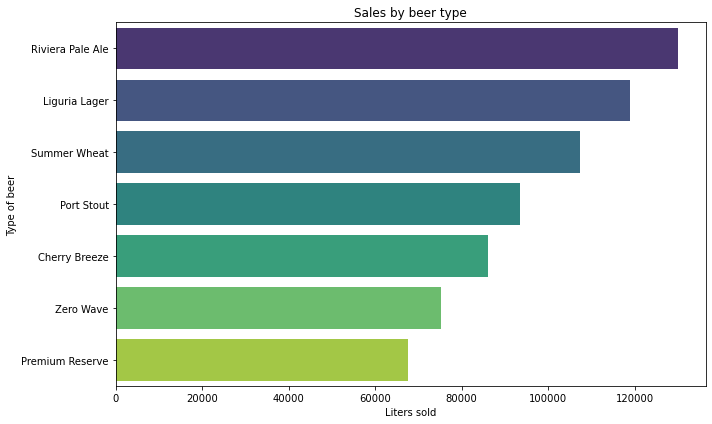

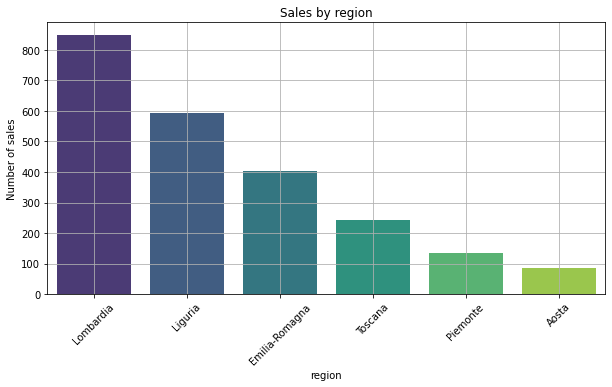

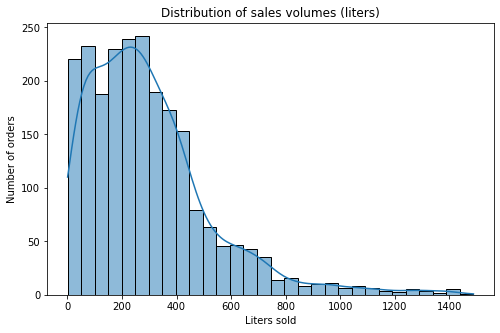

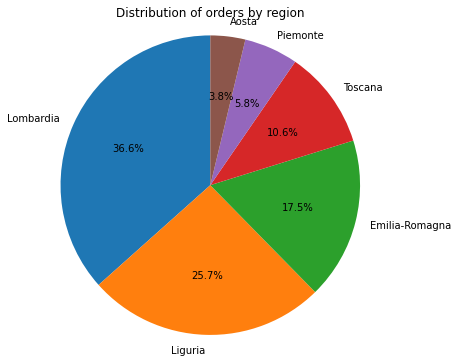

In [39]:
# Group sales by beer type and sum total liters sold
beer_sales = sales_full.groupby('beer_name')['liters_sold'].sum().sort_values(ascending=False)

# Plot sales by beer type
plt.figure(figsize=(10,6))
sns.barplot(x=beer_sales.values, y=beer_sales.index, palette='viridis')
plt.title('Sales by beer type')
plt.xlabel('Liters sold')
plt.ylabel('Type of beer')
plt.tight_layout()
plt.show()

# Count orders by region
plt.figure(figsize=(10, 5))
sns.countplot(data=sales, x="region", order=sales["region"].value_counts().index, palette="viridis")
plt.title("Sales by region")
plt.xlabel("region")
plt.ylabel("Number of sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Distribution of liters sold per sale
plt.figure(figsize=(8,5))
sns.histplot(sales_full['liters_sold'], bins=30, kde=True)
plt.title('Distribution of sales volumes (liters)')
plt.xlabel('Liters sold')
plt.ylabel('Number of orders')
plt.show()

# Pie chart: percentage of orders by region
region_counts = sales_full['region'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of orders by region')
plt.axis('equal')
plt.show()





- **Riviera Pale Ale** is the top-selling beer, followed by **Liguria Lager**.
- Most orders come from **Lombardia and Liguria regions**.
- Sales volumes per order usually stay under **400 liters**.
- Region-wise, Lombardia makes up over **35% of total orders**.

At this step, I cleaned the data before moving deeper into analysis.
I **removed duplicates**, handled **missing values**, and **converted date** columns into a proper datetime format.


In [40]:
# Remove duplicate rows from key tables
production.drop_duplicates(inplace = True)
quality_checks.drop_duplicates(inplace = True)
sales.drop_duplicates(inplace = True)

# Check that duplicates are really gone
production.duplicated().sum()
quality_checks.duplicated().sum()
sales.duplicated().sum()

# If discount is missing, assume no discount (0)
sales['discount'] = sales["discount"].fillna(0)
# Remove rows with remaining missing values
sales.dropna(inplace = True)
production.dropna(inplace = True)

# Double-check that there are no missing values left
sales.isna().sum()
production.isna().sum()

# Convert date columns from text to datetime
production['date'] = pd.to_datetime(production['date'])
sales["sale_date"] = pd.to_datetime(sales['sale_date'])






At this step, I merged all main tables into **extended datasets**.

In [41]:
# Joining tables
sales_full = sales.merge(products, on="product_id", how="left")
production_full = production.merge(products, on="product_id", how="left")
quality_full = quality_checks.merge(production, on="batch_id", how="left", suffixes=('', '_prod'))
quality_full = quality_full.merge(products, on="product_id", how="left")
quality_full = quality_full.merge(workers, on="worker_id", how="left")

# check
sales_full.head()
production_full.head()
quality_full.head()


# Check resulting dataset sizes
print(sales_full.shape, production_full.shape, quality_full.shape)

# Add month column for future time-based analysis
sales_full["mese"] = sales_full['sale_date'].dt.month


(2284, 15) (517, 13) (480, 19)


This allows me to analyze **sales, production, quality, and employees together instead of separately**.
I also added a month column right away to make time-based analysis easier later.

In this block, I calculate key sales and profitability metrics **grouped by beer type, sales channel, and region**.<br>
I also added **AOV (Average Order Value), profit-to-revenue ratio, and seasonal revenue trends** to get a full picture.<br>
This gives me a clear idea of which beers perform best, which channels and regions are most profitable, and where seasonality kicks in.

In [42]:
#  Calculate margin and profit per sale
sales_full["margin_per_liter"] = sales_full['net_price_per_liter'] - sales_full['base_cost_per_liter']  # Маржа с литра
sales_full["profit"] = sales_full['margin_per_liter'] * sales_full['liters_sold']  # Общая прибыль

#  Calculate waste percentage for production
production_full["waste_pct"] = production_full["waste_liters"] / production_full["volume_liters"]  # Процент брака

#  Total revenue by month
sales_by_month = sales_full.groupby('mese')['revenue_eur'].sum()
print(" Total Revenue per Month:\n", sales_by_month)


sales_metrics = sales_full.groupby('beer_name')[["liters_sold", "margin_per_liter", "profit","discount","revenue_eur","base_cost_per_liter"]].agg(['mean','sum'])
#  Sort beers by total revenue
sales_metrics_sorted = sales_metrics.sort_values(('revenue_eur', 'sum'), ascending=False)
sales_metrics_sorted = round(sales_metrics_sorted, 2)
print("\n Beer Sales Metrics Sorted by Total Revenue:\n", sales_metrics_sorted)


#  Display top 7 performing beers
print('\n top 5 performing beers')
display(sales_metrics_sorted.head(5).reset_index())


#  Aggregated sales by beer type
beer_name_agg = sales_full.groupby('beer_name').agg({
    "liters_sold" : 'sum',
    'discount':'mean',
    'profit':'sum',
    'sale_id':'count'
})
print("\n Aggregated Metrics by Beer Type:")
print(beer_name_agg)

#  Aggregated sales by sales channel
channel_agg = sales_full.groupby('channel').agg({
    "liters_sold" : 'sum',
    'discount':'mean',
    'profit':'sum',
    'sale_id':'count'
})
print("\n Aggregated Metrics by Channel:")
print(channel_agg)


#  Aggregated sales by region
region_agg = sales_full.groupby('region').agg({
    "liters_sold" : 'sum',
    'discount':'mean',
    'profit':'sum',
    'sale_id':'count'
})
print("\n Aggregated Metrics by Region:")
print(region_agg)


#  AOV: Average Order Value
AOV = sales_full['revenue_eur'].mean()
print("\n AOV (Average Order Value per Sale):", round(AOV, 2))

#  AOV by Liter (Average revenue per liter)
AOV_liter = sales_full['revenue_eur'].sum() / sales_full['liters_sold'].sum()
print("AOV per Liter Sold:", round(AOV_liter, 2))

#  Profitability Ratio (profit/revenue)
profitability_pct = (sales_full["profit"].sum() / sales_full["revenue_eur"].sum()) * 100
print("Profitability Ratio (% of Revenue):", round(profitability_pct, 2), "%")

#  Total Revenue
total_revenue = sales_full['revenue_eur'].sum()
print("Total Revenue:", round(total_revenue, 2))










 Total Revenue per Month:
 mese
1     173367.64
2     169873.10
3     176206.91
4     167287.95
5     211888.46
6     218837.44
7     227639.48
8     231137.99
9     174759.35
10    176194.61
11    174542.73
12    176588.21
Name: revenue_eur, dtype: float64

 Beer Sales Metrics Sorted by Total Revenue:
                  liters_sold         margin_per_liter          profit  \
                        mean     sum             mean     sum    mean   
beer_name                                                               
Riviera Pale Ale      293.32  129939             2.14  946.87  626.57   
Liguria Lager         277.37  118992             1.90  814.75  526.69   
Port Stout            316.02   93543             2.23  660.73  706.41   
Summer Wheat          281.35  107474             1.95  743.05  547.55   
Premium Reserve       286.32   67571             2.47  583.65  707.89   
Cherry Breeze         335.14   86130             1.80  463.22  605.27   
Zero Wave             312.65   75348  

beer_name liters_sold         margin_per_liter          profit  \
                           mean     sum             mean     sum    mean   
0  Riviera Pale Ale      293.32  129939             2.14  946.87  626.57   
1     Liguria Lager      277.37  118992             1.90  814.75  526.69   
2        Port Stout      316.02   93543             2.23  660.73  706.41   
3      Summer Wheat      281.35  107474             1.95  743.05  547.55   
4   Premium Reserve      286.32   67571             2.47  583.65  707.89   

             discount        revenue_eur            base_cost_per_liter  \
         sum     mean    sum        mean        sum                mean   
0  277571.60     0.03  13.83     1022.55  452989.25                1.35   
1  225948.03     0.03  13.53      859.53  368738.43                1.20   
2  209097.37     0.03   8.91     1196.25  354089.02                1.55   
3  209165.87     0.03  12.08      899.24  343508.37                1.25   
4  167063.05     0.03   6.68     1251.90  295447.95                1.90   

           
      sum  
0  598.05  
1  514.80  
2  458.80  
3  477.50  
4  448.40


 Aggregated Metrics by Beer Type:
                  liters_sold  discount     profit  sale_id
beer_name                                                  
Cherry Breeze           86130  0.031412  155554.34      257
Liguria Lager          118992  0.031541  225948.03      429
Port Stout              93543  0.030118  209097.37      296
Premium Reserve         67571  0.028288  167063.05      236
Riviera Pale Ale       129939  0.031212  277571.60      443
Summer Wheat           107474  0.031634  209165.87      382
Zero Wave               75348  0.029261  121757.71      241

 Aggregated Metrics by Channel:
            liters_sold  discount      profit  sale_id
channel                                               
Private           25113  0.030500    51703.43       88
Restaurant       143299  0.031265   286437.35      475
Store            510585  0.030577  1028017.19     1721

 Aggregated Metrics by Region:
                liters_sold  discount     profit  sale_id
region                     

- **Riviera Pale Ale** is the top-selling and most profitable beer overall.

- **Store channe**l dominates — brings in over **80%** of total revenue.
 
- **Lombardia and Liguria** are the best performing regions.

- **AOV** per sale is around **€997**, which is a solid result for bulk/B2B sales.

- **Profitability ratio** is almost **60%**, which means margins are being managed very well.

- There's a clear **seasonal spike** in demand and revenue from **May to August**.


**Production analytics.**<br>


In [43]:
# Total production volume by beer type
volume_by_beer  = production_full.groupby('type')['volume_liters'].sum().sort_values(ascending=False)
print('Total production volume by beer type')
print(volume_by_beer)                                                    

# Total production volume by shift (day vs night)
volume_by_shift = production_full.groupby("shift")['volume_liters'].sum() 
print('\n Total production volume by shift (day vs night)')
print(volume_by_shift)

# Total waste (defective liters) by shift
waste_by_shift = production_full.groupby('shift')['waste_liters'].sum()
print('Total waste (defective liters) by shift')
print(waste_by_shift)

# Production consistency:
# standard deviation of batch volumes per beer
consistency = production_full.groupby('beer_name')['volume_liters'].std().round(2)
print('\n standard deviation of batch volumes per beer')
print(consistency.sort_values(ascending=False))


# Monthly production volume (resampling by month)
monthly_prod = production_full.resample('M', on='date')['volume_liters'].sum()
# Month-over-month percentage change
monthly_diff = monthly_prod.pct_change() * 100
print("\n Production dynamics by month (% change):")
print(monthly_diff.round(2))


MAX_CAPACITY = 2000
#  Calculate the load 
production_full['utilization_pct'] = (production_full['volume_liters'] / MAX_CAPACITY) * 100
# average load by grade
utilization_report = production_full.groupby('beer_name')['utilization_pct'].mean().round(2)
print("\n Average equipment utilisation by grade (%):")
print(utilization_report.sort_values())




Total production volume by beer type
type
Lager            130987
Wheat            129453
Ale              122714
Fruit Beer       100130
Premium           98602
Stout             98585
Non-Alcoholic     86130
Name: volume_liters, dtype: int64

 Total production volume by shift (day vs night)
shift
day      386536
night    380065
Name: volume_liters, dtype: int64
Total waste (defective liters) by shift
shift
day      10053
night     9760
Name: waste_liters, dtype: int64

 standard deviation of batch volumes per beer
beer_name
Premium Reserve     340.40
Summer Wheat        318.82
Liguria Lager       287.68
Cherry Breeze       284.59
Zero Wave           276.79
Riviera Pale Ale    263.95
Port Stout          262.76
Name: volume_liters, dtype: float64

 Production dynamics by month (% change):
date
2024-01-31      NaN
2024-02-29    -4.03
2024-03-31    -1.94
2024-04-30    -6.36
2024-05-31    23.56
2024-06-30   -16.98
2024-07-31    -7.95
2024-08-31    25.76
2024-09-30   -10.55
2024-10-31     

- **Lager and Wheat** are the most produced beer types, which makes sense — they are classic, high‑demand styles.
- **Day and nigh**t shifts produce almost the same volume.
- **Waste levels are also very similar between shifts**, which means no shift is clearly worse in terms of quality.
- **Premium Reserve** — has the highest production variability, meaning its batch sizes fluctuate more.
- Monthly production shows clear growth **in May and August**, which aligns well with summer demand.
- The average capacity utilization across all beer types ranges from **71% to 78%**. On **average**, nearly a quarter of each tank **25%** remains empty. **Riviera Pale Ale** shows the lowest efficiency at **71.35%**


In this block, I analyze quality defects and their relation to workers, shifts, beer types, and work experience.<br>
I also check defect rates (%), visualize loss patterns, and explore correlations like alcohol content vs. waste.

Worker Stats with Defect Rate (%):


,defects_count,volume_produced,defect_liters,defect_rate_pct
Alessandro Greco,34,48160.0,738,1.53
Chiara Conti,31,46623.0,744,1.60
Davide Moretti,40,61276.0,986,1.61
Elena Ricci,28,40721.0,730,1.79
Francesca Romano,21,31252.0,530,1.70
Giorgio Ferrara,25,40343.0,806,2.00
Giulia Esposito,39,58199.0,927,1.59
Luca Rossi,38,51745.0,846,1.63
Marco Bianchi,34,51150.0,766,1.50
Marta Leone,38,57674.0,1072,1.86



 Median Defect Rate (%): 1.3

 Experience vs Defect Rate:
                   defect_rate_pct  waste_liters  batch_id
experience_years                                         
1.0                          1.70         37.52        21
2.0                          1.74         38.08        66
3.0                          2.00         45.88        25
5.0                          1.61         34.69        72
6.0                          1.61         38.29       156
7.0                          1.79         36.64        28
9.0                          1.50         35.53        34
10.0                         1.61         36.79        71

 Defect Liters by Shift:
    shift  defect_liters
0    day           5764
1  night           5831

 Defects by Type:
 Fermentation issue    131
Packaging defect      117
Contamination         100
Oxidation              92
Off-flavor             40
Name: defect_type, dtype: int64

 Pareto Analysis of Defects:
           defect_type  defect_liters  cum_percen

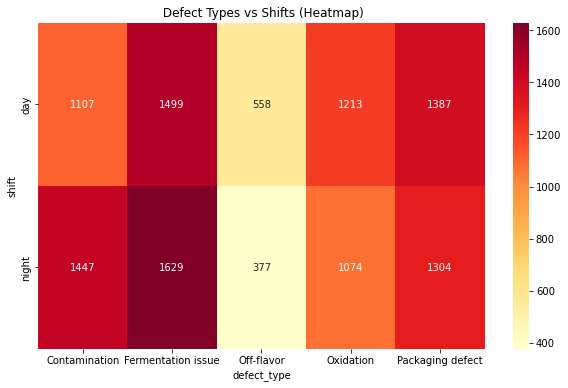

In [44]:
# Number of defects by employees
defects_by_worker = quality_full["worker_name"].value_counts()

# Cooking volume by employees
produced_by_worker = quality_full.groupby('worker_name')["volume_liters"].sum().sort_values(ascending=False)

#  Volume of defective liters by employees
defect_liters_by_worker = quality_full.groupby('worker_name')['defect_liters'].sum()

#  Employee statistics table
worker_stats = pd.DataFrame({
    "defects_count": defects_by_worker,
    "volume_produced": produced_by_worker,
    "defect_liters": defect_liters_by_worker
})

# Let's add a column with % defective
worker_stats["defect_rate_pct"] = ((worker_stats['defect_liters'] / worker_stats['volume_produced']) * 100).round(2)
print("Worker Stats with Defect Rate (%):")
display(worker_stats)

#  Let's add the percentage of defects to the main table
quality_full["defect_rate_pct"] = ((quality_full["defect_liters"] / quality_full["volume_liters"]) * 100).round(2)
# Median Defect Rate (%)
print("\n Median Defect Rate (%):", quality_full["defect_rate_pct"].median())

# Experience vs Defect Rate
experience_impact = quality_full.groupby('experience_years').agg({
    'defect_rate_pct': 'mean',
    'waste_liters': 'mean',
    'batch_id': 'count'
})
print("\n Experience vs Defect Rate:\n", experience_impact.round(2))


#  Defect Liters by Shift
loss_by_shift = quality_full.groupby("shift")["defect_liters"].sum().reset_index()
print("\n Defect Liters by Shift:\n", loss_by_shift)



#  Defects by Type
defects_by_type = quality_full["defect_type"].value_counts()
print("\n Defects by Type:\n", defects_by_type)



# Pareto Analysis of Defects
pareto_df = quality_full.groupby("defect_type")["defect_liters"].sum().reset_index()
pareto_df = pareto_df.sort_values("defect_liters", ascending=False)
pareto_df["cum_percent"] = pareto_df["defect_liters"].cumsum() / pareto_df["defect_liters"].sum() * 100
print("\n Pareto Analysis of Defects:\n", pareto_df)

# Waste Share by Beer Type (Production)
waste_pct_by_beer = production_full.groupby('beer_name').agg({
    'volume_liters': 'sum',
    'waste_liters': 'sum'
})
waste_pct_by_beer['waste_share_%'] = (waste_pct_by_beer['waste_liters'] / waste_pct_by_beer['volume_liters'] * 100).round(2)
print("\n Waste Share by Beer Type (Production):\n", waste_pct_by_beer.sort_values('waste_share_%', ascending=False))

# Waste Cost by Beer
production_full['waste_cost'] = production_full['waste_liters'] * production_full['base_cost_per_liter']
loss_by_beer = production_full.groupby('beer_name')['waste_cost'].sum().round(2)
print("\n Waste Cost by Beer:\n", loss_by_beer.sort_values(ascending=False))

# Correlation between ABV and Waste Rate
production_full['waste_rate'] = production_full['waste_liters'] / production_full['volume_liters']
correlation = production_full['abv'].corr(production_full['waste_rate'])
print(f"\n Correlation between ABV and Waste Rate: {correlation:.2f}")


#  Heat map of defects by type and shift
heatmap_data = quality_full.pivot_table(
    index="shift", columns="defect_type", values="defect_liters", aggfunc="sum", fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title(" Defect Types vs Shifts (Heatmap)")
plt.show()




 ***Employee Efficiency & Defects Summary***

- Median defect rate: 1.3% — acceptable for craft production.

- Matteo Gallo leads by volume (73,904 L) with a low defect rate of 1.55%.

- Experience doesn’t guarantee quality: even senior staff (5–10 yrs) have defect rates of 1.6–2.0%.

- Top 3 causes (fermentation, packaging, contamination) = 70% of all losses → classic Pareto rule.

- Day vs night shifts show nearly identical defect volumes.

**Beer Types & Waste**

- Premium Reserve is worst: 3.97% waste share — needs attention.

- Zero Wave and Port Stout are stable performers (only 2.0–2.3% waste).

**ABV vs Defects**

- Moderate correlation (r = 0.39): higher alcohol % → higher defect rates.


In this notebook, I will analyze **beer sales and production data** to understand profitability, pricing, discounts, <br>
and performance by product, region, and sales channel.

AOV : 997.51
average price per liter sold : 3.36
margin : 0.6
Waste Loss in EUR : 27759.0

Orders With and Without Discount appears


,revenue_eur,profit,margin,liters_sold,sale_id,discount
del_discount,,,,,,
False,1140.553416,700.698137,0.612174,330.826087,161,0.000000
True,986.667343,590.365318,0.599934,294.740462,2123,0.033047



 Total discounts granted: 71,759.73 EUR
 Discounts vs Net Profit: 5.25%

 Regional Profitability (ROI):
                   profit  revenue_eur   roi_%
region                                        
Aosta            47388.09     78704.39  151.32
Emilia-Romagna  225501.09    376812.89  149.03
Liguria         366060.02    610975.27  149.46
Lombardia       496824.65    828933.45  149.60
Piemonte         80570.43    133721.93  151.59
Toscana         149813.69    249175.94  150.78

 ABC Analysis of Beers by Profit:
                     profit  cum_profit_pct
beer_name                                  
Riviera Pale Ale  277571.60       20.317680
Liguria Lager     225948.03       36.856618
Summer Wheat      209165.87       52.167137
Port Stout        209097.37       67.472642
Premium Reserve   167063.05       79.701319
Cherry Breeze     155554.34       91.087582
Zero Wave         121757.71      100.000000


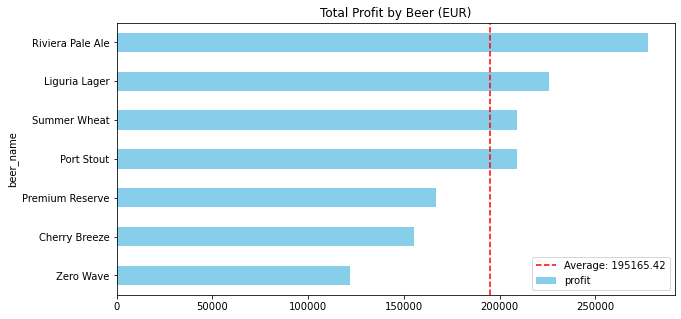

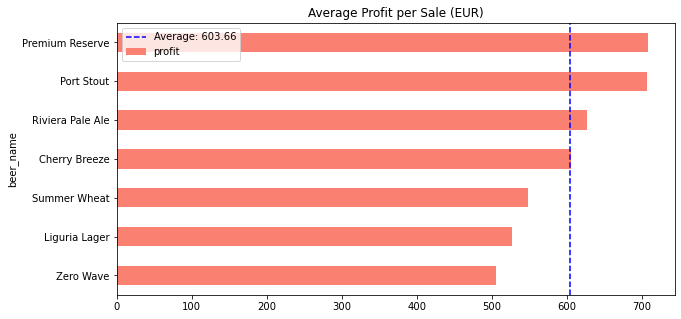

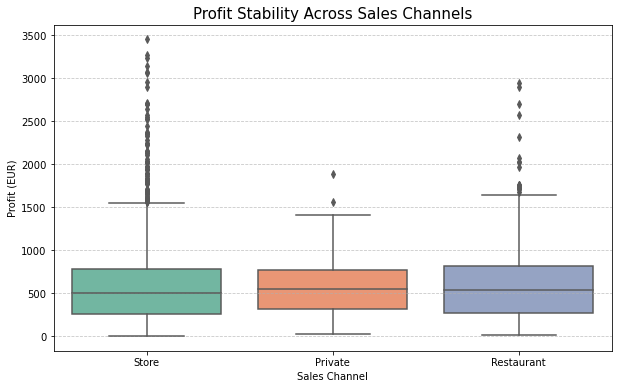

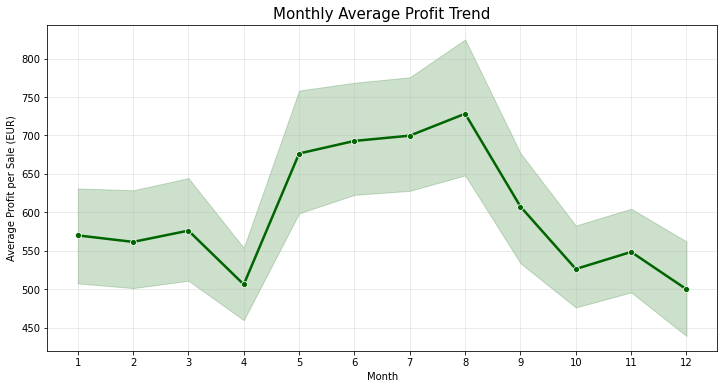

In [45]:
# Calculate Profit and Margin per Sale
sales_full['profit'] = sales_full['revenue_eur'] - (sales_full['liters_sold'] * sales_full['base_cost_per_liter'])


# Average Order Value (AOV) and Average Price per Liter Sold
AOV = sales_full['revenue_eur'].mean()
average_price_per_liter_sold = sales_full['revenue_eur'].sum() / sales_full['liters_sold'].sum()
print('AOV :',round(AOV, 2))
print('average price per liter sold :',round(average_price_per_liter_sold, 2))


# Calculate Margin for Each Sale
sales_full['margin'] = (sales_full['profit'] / sales_full['revenue_eur']).round(2)
print('margin :',round(sales_full['margin'].mean(), 2))


#  Calculate Waste Loss in EUR
production_full["waste_loss_eur"] = production_full["waste_liters"] * production_full['base_cost_per_liter']
print("Waste Loss in EUR :",production_full["waste_loss_eur"].sum())


# Orders With and Without Discount appears
sales_full['del_discount'] = sales_full['discount'] > 0

influenza_del_discount = sales_full.groupby('del_discount').agg({
    "revenue_eur": 'mean',
    "profit": 'mean',
    "margin": 'mean',
    "liters_sold": 'mean',
    "sale_id": 'count',
    "discount": 'mean'
})
print('\nOrders With and Without Discount appears')
display(influenza_del_discount)


# Estimate Revenue Without Discounts
sales_full['potential_revenue'] = sales_full['liters_sold'] * sales_full['list_price_per_liter_y']
total_discount_eur = (sales_full['potential_revenue'] - sales_full['revenue_eur']).sum()
print(f"\n Total discounts granted: {total_discount_eur:,.2f} EUR")
print(f" Discounts vs Net Profit: {(total_discount_eur / sales_full['profit'].sum() * 100):.2f}%")


# Region Profitability (ROI)
region_fin = sales_full.groupby('region').agg({
    'profit': 'sum',
    'revenue_eur': 'sum'
})
region_fin['roi_%'] = (region_fin['profit'] / (region_fin['revenue_eur'] - region_fin['profit']) * 100).round(2)

print("\n Regional Profitability (ROI):")
print(region_fin)


# ABC Analysis of Beers by Profit
abc_profit = sales_full.groupby('beer_name')['profit'].sum().sort_values(ascending=False).to_frame()
abc_profit['cum_profit_pct'] = (abc_profit['profit'].cumsum() / abc_profit['profit'].sum() * 100)

print("\n ABC Analysis of Beers by Profit:")
print(abc_profit)


# Total and Average Profit by Product
profit_by_product = sales_full.groupby("beer_name")["profit"].sum().sort_values(ascending=False)
avg_profit_by_product = sales_full.groupby("beer_name")["profit"].mean().sort_values(ascending=False)

#  Bar Chart: Total Profit 
plt.figure(figsize=(10, 5))
profit_by_product.sort_values(ascending=True).plot(kind='barh', color='skyblue')
avg_total = profit_by_product.mean()
plt.axvline(avg_total, color='red', linestyle='--', label=f'Average: {avg_total:.2f}')
plt.title('Total Profit by Beer (EUR)')
plt.legend()
plt.show()


# Bar Chart: Average Profit per Sale
plt.figure(figsize=(10, 5))
avg_profit_by_product.sort_values(ascending=True).plot(kind='barh', color='salmon')
avg_mean = avg_profit_by_product.mean()
plt.axvline(avg_mean, color='blue', linestyle='--', label=f'Average: {avg_mean:.2f}')
plt.title('Average Profit per Sale (EUR)')
plt.legend()
plt.show()


# Boxplot: Profit Stability Across Channels 
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_full, x='channel', y='profit', palette='Set2')
plt.title('Profit Stability Across Sales Channels', fontsize=15)
plt.xlabel('Sales Channel')
plt.ylabel('Profit (EUR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#  Lineplot: Monthly Profit Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_full, x='mese', y='profit', marker='o', color='darkgreen', linewidth=2.5)
plt.title('Monthly Average Profit Trend', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Average Profit per Sale (EUR)')
plt.xticks(range(1, 13)) 
plt.grid(True, alpha=0.3)
plt.show()


We see that:
- **Average Order Value (AOV)** is around **997.51 EUR**, and the **average price per liter** is about **3.36 EUR**.
- **Average margin** per sale is **60%**, showing strong profitability.
- **Total waste losses** from production amount to **~27,759 EUR**.
- **Discounts reduce revenue**: discounted orders make up ~50% of sales, reducing margin from 61% to 59%.
- **Total discounts granted**: ~71,759 EUR, which is **5.25%** of net profit.
- **Top regions** like Emilia-Romagna and Lombardia yield the best ROI.
- **Riviera Pale Ale** is the leader by total profit, while **Premium Reserve** shows the highest **average profit per sale**.
- **Monthly profit trend** spikes in summer (July–August) and drops toward the end of the year.

In [46]:
# In this section, we conduct a deep dive into Sales Performance and Market Segmentation.

#  Pricing Policy Analysis by Channel
channel_discounts = sales_full.groupby('channel').agg({
    'discount': ['mean', 'max'],
    'profit': 'sum',
    'revenue_eur': 'sum'
})
channel_discounts['discount_weight_%'] = (channel_discounts['discount']['mean'] * 100).round(2)
print("Pricing Policy Analysis by Channel:")
print(channel_discounts)

# Product Mix: Popularity of Beer Types by Channel
channel_mix = sales_full.groupby(['channel', 'type'])['liters_sold'].sum().unstack(fill_value=0)
print("\nBeer Type Distribution by Channel (in liters):")
print(channel_mix)

# Financial Impact: Total Profit Loss due to Discounts
sales_full['discount_amount_eur'] = (sales_full['list_price_per_liter_y'] - sales_full['net_price_per_liter']) * sales_full['liters_sold']
discount_impact = sales_full.groupby('channel')['discount_amount_eur'].sum().round(2)
print("\nTotal Profit Loss due to Discounts by Channel (EUR):")
print(discount_impact.sort_values(ascending=False))

# Unit Economics: Profit per Liter by Channel
channel_unit = sales_full.groupby('channel').agg({
    'profit': 'sum',
    'liters_sold': 'sum'
})
channel_unit['eur_per_liter'] = (channel_unit['profit'] / channel_unit['liters_sold']).round(2)
print("\n Net Profit per Liter by Channel (EUR/L):")
print(channel_unit['eur_per_liter'].sort_values(ascending=False))



Pricing Policy Analysis by Channel:
            discount             profit revenue_eur discount_weight_%
                mean    max         sum         sum                  
channel                                                              
Private     0.030500  0.075    51703.43    86318.73              3.05
Restaurant  0.031265  0.089   286437.35   476888.20              3.13
Store       0.030577  0.100  1028017.19  1715116.94              3.06

Beer Type Distribution by Channel (in liters):
type          Ale  Fruit Beer  Lager  Non-Alcoholic  Premium  Stout  Wheat
channel                                                                   
Private      4904        2302   3190           1932     2229   6164   4392
Restaurant  26737       16544  25625          17032    11375  19743  26243
Store       98298       67284  90177          56384    53967  67636  76839

Total Profit Loss due to Discounts by Channel (EUR):
channel
Store         53978.46
Restaurant    15128.10
Private      

- **Discounts** are stable across **channels 3%**.

- **Retail leads in profit €1M+**, but also has the highest **discount loss €54K**.

- **Private orders** have the highest **profit per liter €2.06** — a high-efficiency, low-volume segment with growth potential.

- **Retail dominates** in volume, especially Lager and Wheat — classic mass-market.

- **Restaurants** and Private drive **premium and specialty beer sales** (Ale, Stout, Fruit Beer) — key for brand image and targeted marketing.




In this section, we focus on **Geo-Analytics and Segment Performance**.

Sales Leaders (Brands) by Channel:
       channel         beer_name  liters_sold
2      Private        Port Stout         6164
11  Restaurant  Riviera Pale Ale        26737
18       Store  Riviera Pale Ale        98298

 Net Profit per Liter by Region (EUR/L):
region
Emilia-Romagna    2.02
Lombardia         2.02
Liguria           2.01
Toscana           2.00
Piemonte          1.99
Aosta             1.97
Name: profit_per_liter, dtype: float64

 Top 5 Least Profitable Segments (Region + Channel):
            region     channel    profit
0            Aosta     Private    203.68
12        Piemonte     Private   2290.08
15         Toscana     Private   3784.42
3   Emilia-Romagna     Private   4771.70
1            Aosta  Restaurant  10308.34

Top Beer Brand for Each Region:
            region         beer_name  liters_sold
5            Aosta      Summer Wheat         5287
8   Emilia-Romagna     Liguria Lager        23247
18         Liguria  Riviera Pale Ale        32697
25       Lombardia  Ri

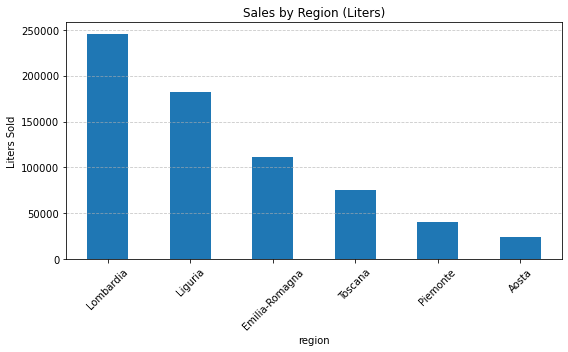

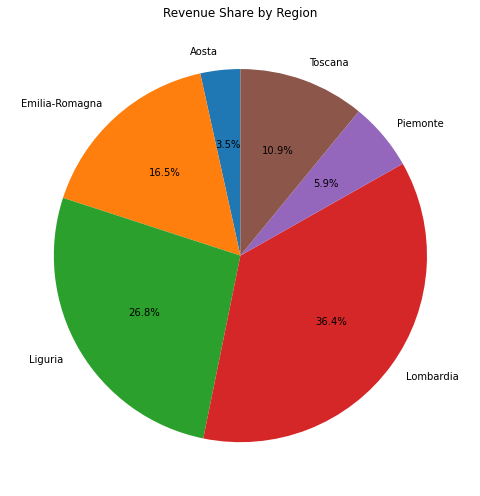

In [47]:
# 🌍 Geo-Analytics & Segment Performance

# Finding the top-selling beer brand for each channel
top_beer_channel = sales_full.groupby(['channel', 'beer_name'])['liters_sold'].sum().reset_index()
top_beer_channel = top_beer_channel.sort_values(['channel', 'liters_sold'], ascending=[True, False]).drop_duplicates('channel')

print("Sales Leaders (Brands) by Channel:")
print(top_beer_channel)

# Regional Efficiency: Profit per liter by region
region_efficiency = sales_full.groupby('region').agg({
    'profit': 'sum',
    'liters_sold': 'sum'
})
region_efficiency['profit_per_liter'] = (region_efficiency['profit'] / region_efficiency['liters_sold']).round(2)

print("\n Net Profit per Liter by Region (EUR/L):")
print(region_efficiency['profit_per_liter'].sort_values(ascending=False))

# Segment Analysis: Identifying the 5 least profitable segments (Region + Channel)
segment_analysis = sales_full.groupby(['region', 'channel'])['profit'].sum().reset_index()
worst_segments = segment_analysis.sort_values('profit').head(5)

print("\n Top 5 Least Profitable Segments (Region + Channel):")
print(worst_segments)

# Identifying the top beer brand for each region
top_beer_by_region = sales_full.groupby(["region", "beer_name"])["liters_sold"].sum().reset_index()
# print(top_beer_by_region)
top_beer_each_region = top_beer_by_region.sort_values("liters_sold", ascending=False).drop_duplicates("region")
print("\nTop Beer Brand for Each Region:")
print(top_beer_each_region.sort_values("region"))

# Identifying the main sales hit in each region (Sorted)
region_fav = sales_full.groupby(['region', 'beer_name'])['liters_sold'].sum().reset_index()
region_fav = region_fav.sort_values(['region', 'liters_sold'], ascending=[True, False]).drop_duplicates('region')
   
print("\nMain Sales Hit in Each Region:")
print(region_fav[['region', 'beer_name', 'liters_sold']])

# Calculating Regional ROI (Preparation for further analysis)
region_roi = sales_full.groupby('region').agg({
    'profit': 'sum',
    'base_cost_per_liter': 'mean',
    'liters_sold': 'sum'
})

# Visualization: Sales by Region (Liters)
region_sales = sales_full.groupby("region")["liters_sold"].sum().sort_values(ascending=False)

region_sales.plot(kind='bar', figsize=(8,5))
plt.title("Sales by Region (Liters)")
plt.ylabel("Liters Sold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




region_revenue =  sales_full.groupby('region')['revenue_eur'].sum()

# Visualization: Revenue Share by Region (Pie Chart)
region_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), startangle=90)
plt.title("Revenue Share by Region")
plt.ylabel("")
plt.tight_layout()
plt.show()

- **Lombardia and Liguria** lead the market — they generate the highest sales volume and revenue.

- **Riviera Pale** Ale is the top-performing beer across stores, restaurants, and most regions.

- Each region has its own bestseller, which means **customer preferences** differ by geography.

- Profit per liter is very **stable 2 EUR** across regions — pricing strategy looks well balanced.

- **Store channel** is the main volume driver, but Private channel shows the weakest profitability, especially in smaller regions.

**Where and through which channel we sell matters more than the beer itself — channel and region strategy is key.**

In this block we will segment our sales portfolio.

In [48]:
# Segmentation and Clustering Analysis

#  Volume Segmentation
def categorize_volume(q):
    if q <= 130:
        return 'Small 0-130'
    elif 130 < q <= 250:
        return 'Medium 130-250'
    elif 250 < q <= 400:
        return 'Large 250-400'
    else:
        return 'Extra Large 400-1490'
    
sales_full['volume_segment'] = sales_full['liters_sold'].apply(categorize_volume)

volume_analysis = sales_full.groupby('volume_segment').agg({
    'sale_id':'count',
    "liters_sold":['sum','mean'],
    "profit": ['sum','mean'],
    "discount": 'mean'       
})

print("Metrics by Volume Segments")
display(volume_analysis) 

#  ABV Segmentation (Alcohol by Volume)
def categorize_abv(abv):
    if abv < 4:
        return 'Light'
    elif 4 <= abv < 6:
        return 'Medium'
    else:
        return 'Strong'
        
sales_full['abv_segment'] = sales_full['abv'].apply(categorize_abv)

abv_analysis = sales_full.groupby('abv_segment').agg({
    'sale_id':'count',
    "liters_sold":['sum','mean'],
    "profit": ['sum','mean'],
    "discount": 'mean'
})

print("\n Metrics by ABV Segments")
display(abv_analysis)

#  Cross-Analysis Matrix (Volume vs ABV)
matrix_analysis = sales_full.pivot_table(
    index='volume_segment', 
    columns='abv_segment', 
    values='profit', 
    aggfunc='sum'
)

print("\n Profitability Matrix (Volume vs ABV)")
display(matrix_analysis)

#  Price Segmentation based on Quantiles
price_bins = sales_full['net_price_per_liter'].quantile([0, 0.33, 0.66, 1]).values

def categorize_price(price):
    if price <= price_bins[1]:
        return 'Economy'
    elif price <= price_bins[2]:
        return 'Standard'
    else:
        return 'Premium'

sales_full['price_segment'] = sales_full['net_price_per_liter'].apply(categorize_price)

price_analysis = sales_full.groupby('price_segment').agg({
    'sale_id':'count',
    "liters_sold":['sum','mean'],
    "profit": ['sum','mean'],
    "discount": 'mean'
})

print("\n Metrics by Price Segments")
display(price_analysis)




# sales_full.head(5)
# # print(r)
# print(production_full)
# # print(sales_full)

Metrics by Volume Segments


sale_id liters_sold                 profit               \
                       count         sum        mean        sum         mean   
volume_segment                                                                 
Extra Large 400-1490     560      342672  611.914286  690446.99  1232.941054   
Large 250-400            604      193051  319.620861  384926.29   637.295182   
Medium 130-250           549      106073  193.211293  215194.01   391.974517   
Small 0-130              571       37201   65.150613   75590.68   132.382977   

                      discount  
                          mean  
volume_segment                  
Extra Large 400-1490  0.029764  
Large 250-400         0.031141  
Medium 130-250        0.031046  
Small 0-130           0.030888


 Metrics by ABV Segments


sale_id liters_sold                 profit              discount
              count         sum        mean        sum        mean      mean
abv_segment                                                                 
Light           498      161478  324.253012  277312.05  556.851506  0.030371
Medium         1490      423976  284.547651  879748.55  590.435268  0.030952
Strong          296       93543  316.023649  209097.37  706.410034  0.030118


 Profitability Matrix (Volume vs ABV)


abv_segment,Light,Medium,Strong
volume_segment,,,
Extra Large 400-1490,152361.96,427812.43,110272.60
Large 250-400,82124.25,248237.84,54564.20
Medium 130-250,29787.52,152347.30,33059.19
Small 0-130,13038.32,51350.98,11201.38



 Metrics by Price Segments


sale_id liters_sold                 profit              discount
                count         sum        mean        sum        mean      mean
price_segment                                                                 
Economy           782      240315  307.308184  423513.41  541.577251  0.036430
Premium           765      228919  299.240523  524980.28  686.248732  0.025166
Standard          737      209763  284.617368  417664.28  566.708657  0.030418

- **Large and Extra-Large orders** generate the majority of **revenue and profit** — big volumes truly **drive the business**.

- **Average order value** and **profit** grow together with **volume**, even with similar discount levels — **scale really matters**.

- **High-ABV beers** deliver **higher profit per sale**, but are sold in **smaller volumes**.

- **Medium-ABV beers** are the **most stable segment**, offering a strong **balance between volume and margin**.

- **Premium products** show the **highest average profit per sale**, despite **lower total volumes**.

- **Discount levels are almost uniform 3%** across all segments, but their **impact is more visible in mass-market sales**.

- **Small orders** are the **least efficient segment**, with **low volume** and **minimal contribution** to total profit.

 **Overall, focusing on large orders, premium products, and medium-strength beers delivers the best financial results without aggressive discounting**.

# **Final Conclusions & Strategic Recommendations**

After completing this analysis, the brewery demonstrates **strong financial performance**, **operational stability**, and **high profitability**.

In 2024, the company produced **767K liters across 517 batches** (avg. **1.48K liters per batch**) and sold **682K liters**, leaving **85K liters in inventory** — indicating **healthy demand** and **manageable stock levels**.

---

## **Financial Performance**

- **€2.29M revenue**
- **€1.37M profit**
- **60% profit margin**

The business model is **efficient**, **profitable**, and **scalable**.

---

## **Operational & Quality Metrics**

- **1.56% overall defect rate**
- ~**20K liters defective** (acceptable for craft production standards)

Operational performance is stable, but **optimization potential remains**.

---

# **Strategic Optimization Opportunities**

## **1. Seasonality-Driven Production Planning**

Sales peak from **May to September**, driven by **Lager and lighter styles**, while winter demand shifts toward **stronger beers (Stout, Premium)**.

**Recommendations:**

- Increase **Lager production ahead of summer**
- Prepare **stronger beer inventory before winter**
- Reduce **off-season overproduction** to minimize storage costs and waste risk

Seasonal production alignment can improve **working capital efficiency** and reduce inventory pressure.

---

## **2. High Defect Products – Margin Leakage**

Three products show **above-average defect rates**:

- Port Stout
- Cherry Breeze
- Premium Reserve

Even marginal defect reduction could materially improve **overall profitability**.

**Recommendations:**

- Review **fermentation control and temperature stability**
- Standardize **raw material quality checks**
- Introduce **batch-level KPI monitoring**

Small operational improvements here can deliver **high ROI impact**.

---

## **3. Discount Policy – Critical Profit Erosion**

The data shows a consistent pattern:

When discounts are applied:

- **Revenue decreases**
- **Profit shrinks**
- **Volume does not increase**
- **Margin falls**

The current discount structure does not demonstrate measurable volume stimulation and appears to negatively impact **profitability**.

**Recommendations:**

- Shift to **value-based pricing**
- Replace blanket discounts with **targeted promotions**
- Implement **volume-based differentiated discounts**

Pricing discipline is a key **profit lever**.

---

## **4. Segment Economics – XL as the Profit Engine**

The **Extra Large (XL)** segment generates disproportionate value:

- **€690K profit vs €75K in Small**
- **9x more total profit**
- **10x more profit per client**

Although order count is similar, **volume concentration drives superior efficiency**.

**Strategic Focus:**

- Prioritize **B2B and large-volume clients**
- Develop **retention programs for XL**
- Apply structured **volume discounts exclusively to XL**
- Reduce discount intensity in the **Small segment**

The Small segment generates activity but contributes minimal profit — **high operational effort, low financial return**.

Additionally, discount rates are nearly identical across segments (~3%), regardless of order size — indicating **pricing inefficiency**.

Segment-based pricing differentiation is required.

---

## **5. Geo-Analytics – Regional ROI Optimization**

**Lombardia** and **Emilia-Romagna** deliver the highest **profit per liter** and **ROI**.

**Recommendations:**

- Strengthen distribution and partnerships in **high-performing regions**
- Investigate underperforming areas (Aosta, Piemonte) — pricing, logistics, or product mix
- Apply **geo-targeted product strategies**

Regional optimization can improve margins without expanding sales volume.

---

## **6. Employee Performance & Process Stability**

Defect rates range between **1.5%–2%**, with median at **1.3%**.

Experience does not strongly correlate with lower defect rates.

This suggests **process control outweighs tenure**.

**Recommendations:**

- Standardize **quality control protocols**
- Introduce **KPI dashboards per batch**
- Prioritize **process consistency over individual dependency**

---

# **Strategic Summary**

The brewery is **not in crisis**.  
It is **profitable**, **scalable**, and **operationally stable**.

However, profit growth does not require higher sales volume — it requires **smarter optimization**.

**Primary levers:**

- **Discount discipline**
- **Defect reduction**
- **Seasonal production alignment**
- **XL segment prioritization**
- **Regional focus**

